In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from dl.utils.helpers import load_master_csv
from dl.dataset.datamodes.npz.rgbd import RGBDNPZ

# dataset_path = '/data2/jupiter/datasets/Jupiter_train_v6_2/'
# anno_path = 'master_annotations_20231019_clean.csv'
dataset_path = '/data2/jupiter/datasets/halo_rgb_stereo_train_v6_1/'
anno_path = 'master_annotations.csv'
df = load_master_csv(dataset_path + anno_path)
rgbdnpz = RGBDNPZ(dataset_path)
artifacts = rgbdnpz.get_artifacts(df.iloc[0])
plt.imshow(artifacts['depth'])

/tmp/ipykernel_181755/3214718955.py:8: DtypeWarning: Columns (2,3,24,82,93,94,95,96,97,99,100,102,103,104,105,106,107,108,109,110,120,153,157,158,163,174,177,180,181,187,189,199,200,202,203,204,205,225,230,231,232,235,237,239,240,251,252,254,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,275,279,280,281,284,285,286,288) have mixed types.Specify dtype option on import or set low_memory=False.
  df = load_master_csv(dataset_path + anno_path)


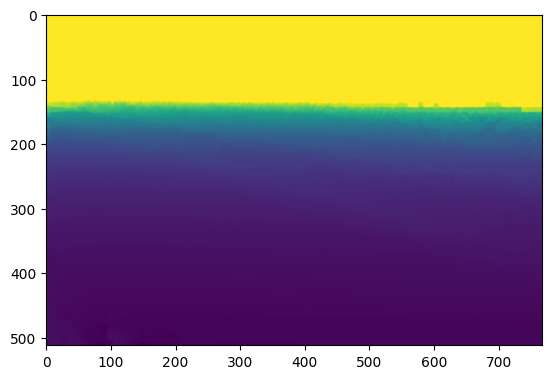

In [3]:
df[df['id'] == '5f9d6a1bd61e89229bd3c90a']['label_map']

Series([], Name: label_map, dtype: object)

In [4]:
from dl.dataset.datamodes.npz.rgbd import RGBDNPZ

rgbdnpz = RGBDNPZ(dataset_path)

In [9]:
ids = [
    '654a6d2525cc78d2cd8e5a7b',
    '6532779aae75c2fba1f35e4c',
    '654f121c2cd5d43831a1bd6f',
    '654ad76fe36d649916d17a98',
]

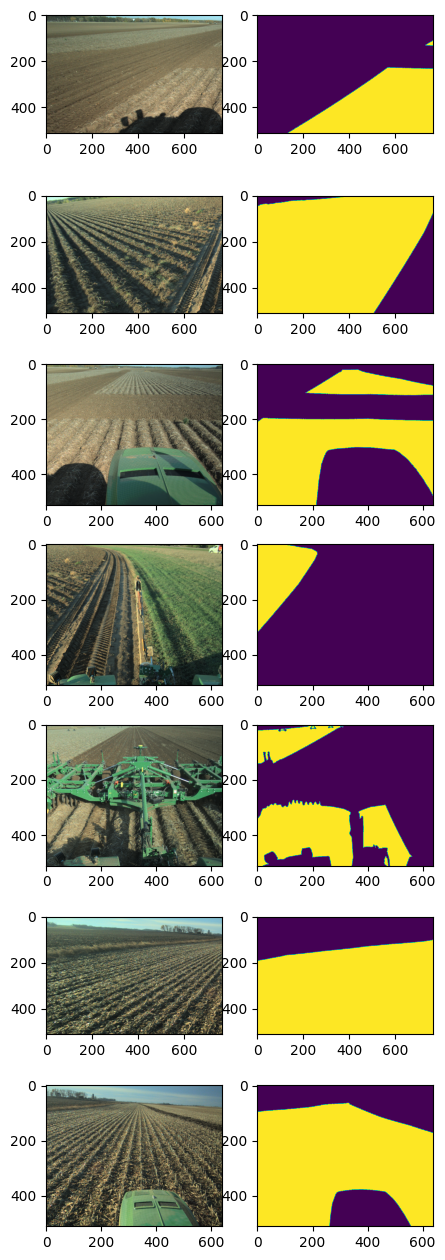

In [10]:
def viz_some_images(rows):
    fig, ax = plt.subplots(len(rows), 2,  figsize=(5,16))
    for i, (_, row) in enumerate(rows.iterrows()):
        artifacts = rgbdnpz.get_artifacts(row)
        ax[i][0].imshow(artifacts['image'])
        ax[i][1].imshow(artifacts['label'] == 31)
viz_some_images(df[df['id'].isin(ids)])

(array([ 2,  6,  7, 31]), array([ 12034,   1249,   8067, 371866]))


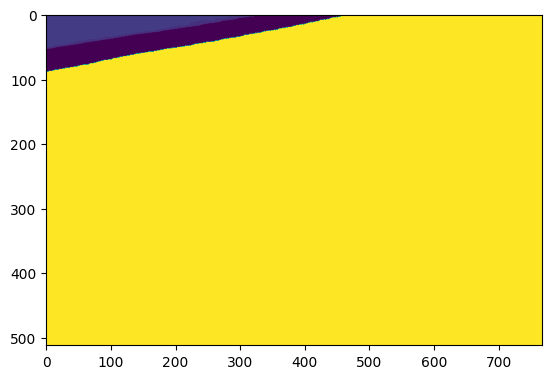

In [29]:
print(np.unique(artifacts['label'], return_counts=True))
plt.imshow(artifacts['label'])

In [ ]:
import matplotlib as mpl
classlabels_viz_colors = [
    "white",  # Ignored labels mapped to white so that they do not change color when masked - we don't care about them either way, so a color change does not make sense
    "green",
    "yellow",
    "blue",
    "red",
    "magenta",
    "cyan",
    "lightseagreen",
    "brown",
    "magenta",
    "olive",
    "wheat",
    "black",
]
classlabels_viz_bounds = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

classlabels_viz_cmap = mpl.colors.ListedColormap(classlabels_viz_colors)
classlabels_viz_norm = mpl.colors.BoundaryNorm(classlabels_viz_bounds, classlabels_viz_cmap.N)

In [ ]:
np.unique(artifacts['label'])

In [ ]:
np.unique(label)

In [ ]:
label = artifacts['label'].copy()
label[label == 0] = -1
label[label == 2] = 0
label[label == 11] = 5
plt.imshow(label,classlabels_viz_cmap,classlabels_viz_norm,interpolation="nearest",alpha=None)

In [ ]:
plt.imshow(artifacts['image'])

In [ ]:
for i in range(100):
    s = np.sum(rgbdnpz.get_artifacts(df.iloc[i])['label'] == 11)
    if s > 0 and df.iloc[i]['label_map']['11'] == 'Humans':
        print(i, s)

In [ ]:
base_ind = 2
hum_ind = 50
im_no_hum = rgbdnpz.get_artifacts(df.iloc[base_ind])['image']
im_w_hum =  rgbdnpz.get_artifacts(df.iloc[hum_ind])['image']
mask =(rgbdnpz.get_artifacts(df.iloc[hum_ind])['label'] == 11)[:,:,None]

In [ ]:
# Vanilla CNP
# plt.imshow(im_w_hum * mask)
# plt.imshow(im_no_hum)
plt.imshow(im_no_hum * (1 - mask) + im_w_hum * mask)

In [ ]:
from pietorch import blend_dst_numpy
import torch
target : torch.Tensor = torch.Tensor(im_no_hum) # 3 x N x M image to be blended into
source : torch.Tensor = torch.Tensor(im_w_hum) # 3 x H x W image to be blended
human_mask : torch.Tensor = torch.Tensor(mask)[:,:,0] # H x W mask of which pixels from source to be included
corner : torch.Tensor = torch.IntTensor([0,0]) # [y, x] coordinate of location in target for source to be blended
# result = blend(target, source, human_mask,corner, True, channels_dim=2)
result = blend_dst_numpy(im_no_hum, im_w_hum, mask[:,:,0],corner.numpy(), False, channels_dim=2)

plt.imshow(result)
